<p align="center">
  <img width="100" height="100" src="../images/logo.png">
</p>

<div>
<h1>01. EDA</h1> 

Canadian Car Accidents Practice <br>
<strong>Aprendizaje Automático</strong> <br>
<strong>Master Universitario en Ciencia de Datos</strong>
</div>

<div style='text-align:right'>Álvaro Serrano del Rincón (<i>a.serranodelrincon@cunef.edu</i>)</div>
<div style='text-align:right'>Carlos Viñals Guitart (<i>carlos.vinals@cunef.edu</i>)</div>

---

## 1.0 Introducción

En este notebook se realizará un análisis exploratorio de los datos, a fin de poder entender mejor el dataset de cara a realizar el posterior tratamiento y la estimación de los modelos. Se trata de una parte fundamental, pues un correcto EDA permitirá responder a las preguntas de negocio de una manera más precisa, y elaborar unos modelos mejores.

Es IMPORTANTE haber revisado previamente el notebook ```00.Introducción```, en el cual se explican los objetivos de negocio que se tendrán en cuenta al elaborar este análisis.

Este trabajo utiliza un entorno de propósito espécifico.

In [1]:
# Verificamos el entorno: ML_P1
!conda info


     active environment : ML_P1
    active env location : C:\Users\carviagu\anaconda3\envs\ML_P1
            shell level : 2
       user config file : C:\Users\carviagu\.condarc
 populated config files : 
          conda version : 4.10.3
    conda-build version : 3.21.4
         python version : 3.8.8.final.0
       virtual packages : __cuda=11.3=0
                          __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\carviagu\anaconda3  (writable)
      conda av data dir : C:\Users\carviagu\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/no

### 1.0.1 Objetivo de negocio
A continuación repasamos el objetivo de negocio marcado en el notebook ```00. Introducción```, que es proporcionar a la aseguradora un modelo de machine learning con base empírica, que pueda servirle a esta entidad como base de cara a tomar decisiones empresariales concretas, y con una posible aplicación en seguros de coche, de salud, de vida... 

Si bien, más concretamente los modelos que se procederán a desarrollar, están orientados predecir la posibilidad de fallecimientos en un accidente en función de las características del mismo.

### 1.0.2 Estructura
0. Librerías
1. Los Datos
    * Importanción
    * Diccionario de Datos
    * Información concodia
2. EDA
    * Análisis de tipos
    * Análisis de valores especiales
    * Análisis de valores missings
    * Repeticiones en el dataset
    * Análisis de las variables objetivo
    * Análisis de variables continuas
    * Análisis de variables categóricas 
3. Algunas preguntas interesantes y sus respuestas
4. Conclusiones
    * Conclusiones generales
    * Propuesta de modelos

## Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import nbconvert

%matplotlib inline

## Scripts

Trabajamos con script propio donde se encuentran funciones propias. 

In [3]:
import sys

import sys  
sys.path.insert(0, '../scripts/')

import csv_tools

## 1.1 Los Datos

Primer vistazo a los datos

### 1.1.1 Importación
Importamos los datos. Hacemos uso de una función propia que verifica si existe el archivo previamente en el repositorio. En caso contrario se puede descargar aquí: https://www.kaggle.com/tbsteal/canadian-car-accidents-19942014

In [4]:
# Función propia que verifica que existe el fichero de datos previamente.
accidents_df = csv_tools.csv_import(origin = '../data/NCDB_1999_to_2014.csv')

Reading file...
Reading ended.


In [5]:
accidents_df.head(5)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,01,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,01,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,01,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


In [6]:
print('Total de filas del dataset: ', len(accidents_df.index))

Total de filas del dataset:  5860405


In [7]:
print('Total de columnas del dataset: ', len(accidents_df.columns))

Total de columnas del dataset:  22


### 1.1.2 Diccionario de datos
En el Diccionario de Datos, se explica de forma detallada la información correspondiente a cada variable que se empleará en los modelos. Este puede encontrarse en la carpeta ```docs``` del repositorio con el nombre ```DiccionarioDatosESP.pdf```. En él, se introduce brevemente el dataset, y se explica de forma detalla cada variable. A continuación revisamos su contenido.

El dataset a utilizar es Canadian Car Accidents (```NCDB_1999_to_2014.csv```), que proporciona información relativa a accidentes por colisiones de vehículos en Canadá. En líneas generales, este dataset posee un total de **22 variables de estudio** que se corresponden con las columnas del dataset. Asimismo, las variables se agrupan en tres subcategorías: **Datos relativos al accidente** (C_), **Datos relativos al vehículo** (V_) y **Datos relativos a la persona(s) involucradas** (P_). 

En concreto, la información muestra el dataset es relativa a personas, es decir, existe un registro de cada persona involucrada en el accidente, el vehículo en el que iba y los datos de su accidente. Analicemos un ejemplo para entender adecuadamente la información que contiene este dataset:

1. Veamos el primer accidente registrado en el dataset a modo de ejemplo, que tuvo lugar en enero de 1999:

In [8]:
# Accidente a analizar
first_accident = accidents_df[(accidents_df['C_YEAR'] == 1999) & (accidents_df['C_MNTH'] == '01') &
            (accidents_df['C_WDAY'] == '1') & (accidents_df['C_HOUR'] == '20') &
             (accidents_df['C_SEV'] == 2) & (accidents_df['C_VEHS'] == '02') &
              (accidents_df['C_CONF'] == '34') & (accidents_df['C_RCFG'] == 'UU') & 
               (accidents_df['C_WTHR'] == '1') & (accidents_df['C_RSUR'] == '5') &
                (accidents_df['C_RALN'] == '3') & (accidents_df['C_TRAF'] == '03')]

In [9]:
# Datos del accidente
acc_columns = ['C_YEAR', 'C_MNTH', 'C_WDAY', 
               'C_HOUR', 'C_SEV', 'C_VEHS', 
               'C_CONF', 'C_RCFG', 'C_WTHR', 
               'C_RSUR', 'C_RALN', 'C_TRAF']
first_accident[acc_columns]

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF
0,1999,01,1,20,2,02,34,UU,1,5,3,03
1,1999,01,1,20,2,02,34,UU,1,5,3,03
2,1999,01,1,20,2,02,34,UU,1,5,3,03


Podemos observar el accidente ocurrido: 
* ¿Cuándo?: En la primera semana (```C_WDAY = 1```), de Enero (```C_MNTH = 1```), del año 1999 (```C_YEAR = 1999```).
* No hubo fallecidos (```C_SEV = 2```). 
* Sucedió a las 20 horas (```C_HOUR = 20```).
* Había dos vehículos implicados (```C_VEHS = 02```).
* El accidente fue de dos vehículos en sentido opuesto al girar a la derecha en un cruce. (```C_CONF = 34```)
* Se desconoce la configuración de la carretera. (```C_RCFG = UU```)
* Hacía un día soleado y claro. (```C_WTHR = 1```)
* El asfalto estaba congelado. (```C_RSUR = 5```)
* En una curva sin desnivel. (```C_RALN = 3```)
* Había una señal de stop. (```C_TRAF = 03```)


Observamos que se repite tres veces, esto ya nos indica que hay **tres personas implicadas**.

In [10]:
# Datos de los vehículos
car_columns = ['V_ID', 'V_TYPE', 'V_YEAR']
first_accident[car_columns]

,V_ID,V_TYPE,V_YEAR
0,01,06,1990
1,02,01,1987
2,02,01,1987


En cuanto a los vehículos implicados, observamos dos, si bien uno de ellos se repite dos veces, pues en ese viajaban dos personas. 
* El primer vehículo es del año 1990 (```V_YEAR = 1990```) y es de tipo 6 (```V_TYPE = 6```).
* El segundo es del año 1987 (```V_YEAR = 1987```) y es de pasajeros o servicio auxiliar (```V_TYPE = 1```). 

In [11]:
# Datos de las personas
per_columns = ['P_ID', 'P_SEX', 'P_AGE', 
               'P_PSN', 'P_ISEV', 'P_SAFE',
               'P_USER']
first_accident[per_columns]

,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,01,M,41,11,1,UU,1
1,01,M,19,11,1,UU,1
2,02,F,20,13,2,02,2


Ahora ya podemos analizar a las tres personas implicadas. 

* **En el primer vehículo**, viaja solo una persona (```P_ID = 01```), tiene 41 años (```P_AGE = 41```), es hombre (```P_SEX = M```) y, evidentemente, conducía el vehículo (```P_USER = 1```) y por lo tanto estaba en la posición del conductor (```P_PSN = 11```). Después del accidente salió ileso (```P_ISEV = 1```). Se desconoce si llevaba o utilizaba algún dispositivo de seguridad (```P_SAFE = UU```).


* **En el segundo vehículo**, había dos personas. Un hombre (```P_SEX = M```), de 19 años (```P_AGE = 19```), que conducía el vehículo (```P_USER = 1```), y que salió ileso del accidente (```P_ISEV = 1```). La mujer (```P_SEX = F```) de 20 años (```P_AGE = 20```) iba de pasajera en el asiento delantero derecho (```P_PSN = 13```). Por desgracia salió herida (```P_ISEV = 2```) del accidente pese a utilizar un dispositivo de seguridad, en este caso un cinturón (```P_SAFE = 02```).


Como podemos observar el dataset nos da información bastante detallada de los accidentes al nivel de las personas involucradas en los mismos.

A continuación, procedemos a observar todos los valores que pueden tomar las variables del dataset:

In [12]:
for col in accidents_df.columns:
    print(col)
    print(accidents_df[col].unique())
    if (col != 'P_USER'): 
        print('-------------------------')

C_YEAR
[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014]
-------------------------
C_MNTH
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' 'UU']
-------------------------
C_WDAY
['1' '2' '3' '4' '5' '6' '7' 'U']
-------------------------
C_HOUR
['20' '08' '17' '15' '14' '01' '11' '13' '19' '16' '09' '02' '18' '12'
 '10' '23' '00' '06' '07' '21' 'UU' '05' '22' '03' '04']
-------------------------
C_SEV
[2 1]
-------------------------
C_VEHS
['02' '01' '03' '04' '06' '07' '09' 'UU' '05' '13' '08' '12' '14' '10'
 '11' '16' '26' '71' '19' '25' '21' '27' '15' '35' '22' '41' '46' '31'
 '18' '56' '23' '36' '17' '20' '29' '77' '28' '38' '32' '33' '54' '72'
 '40' '44' '58' '30' '24' '34' nan '39' '51' '57' '43' '37']
-------------------------
C_CONF
['34' '01' 'QQ' '04' '31' '21' '23' '03' '02' '33' 'UU' '24' '35' '41'
 '06' '32' '36' '05' '22' '25']
-------------------------
C_RCFG
['UU' 'QQ' '01' '02' '03' '05' '04' '06' '08' '07' '09' '10']
------

### 1.1.3 Información conocida
Antes de comenzar con el análisis exploratorio, es importante comenzar a concretar cuáles podrían ser las variables objetivo de esta investigación.

A priori, parece razonable determinar como variable objetivo la severdidad del accidente (```C_SEV```), de manera que se construya un modelo que pueda determinar si habrá o no algún fallecido en el accidente, dadas unas determinadas características.

Por otro lado, la otra variable objetivo del modelo sería ```P_ISEV```, que hace referencia al estado de la persona después del accidente, y de acuerdo con el dataset, una persona puede salir **ilesa** (```P_ISEV = 1```), **herida** (```P_ISEV = 2```) o **fallecida** (```P_ISEV = 3```). Los modelos con esta variable objetivo, estarían orientados a determinar si, dado un accidente, es probable que haya heridos en el mismo. Asumimos que los heridos en el siniestro necesitarán un tratamiento médico. 

## 1.2 Análisis: EDA

### 1.2.1 Análisis de tipos
Analizamos el número de columnas, sus nombres y tipos:

In [13]:
print('Listado de columnas con su respectivo tipo de dato')
print('--------------------------------------------------')
types_df = accidents_df.dtypes.reset_index()
types_df.columns = ['columna', 'tipo_dato']
types_df

Listado de columnas con su respectivo tipo de dato
--------------------------------------------------


,columna,tipo_dato
0,C_YEAR,int64
1,C_MNTH,object
2,C_WDAY,object
3,C_HOUR,object
4,C_SEV,int64
5,C_VEHS,object
6,C_CONF,object
7,C_RCFG,object
8,C_WTHR,object
9,C_RSUR,object


Podemos observar que la mayoría de columnas son tratados como ```object```. Es extraño pues un primer vistazo con la función ```head``` a mostrado que en su mayoría se corresponden con valores enteros, los que sabemos, por el diccionario de datos elaborado, se refieren a categorías. Un estudio más detenido de los datos nos enseña la existencia de valores especiales que justifican la lectura de estas columnas como ```object```, los cuales estudiamos a continuación.

### 1.2.2 Análisis de valores especiales

Estudiamos valores especiales del dataset.

En este dataset los valores especiales se clasifican en tres tipos:
* ```Q```: Este valor indica que se corresponde con una categoría distinta a las demás.
* ```N```: Este valor indica que el criterio de valoración no es aplicable. Este se corresponde generalmente, con tuplas que son valores dummies y por lo tanto no necesita esta información.
* ```U```: Este valor indica que se desconoce, un valor faltante.
* ```X```: Este valor indica que el valor está clasificado y no ha sido proporcionado.

Estos valores, si bien son universales al dataset, no están presentes en todas las variables. Además se presentan de distinta manera, pudiendo presentarse de los siguientes formatos: ```U```, ```UU``` y ```UUUU```.

Estos valores no representan la misma información y por lo tanto deberán tratarse de forma distinta.

A continuación, presentamos una tabla resumen de la existencia de estos valores en el dataset. Cada columna referencia el número de ocurrencias de cada valor (en cualquiera de sus formas) en la columna, el porcentaje sobre el total de valores de la columna, y también el total de los cuatro tipos.

In [14]:
def special_values_summary(df = None, vals = []):
    '''
    Devuelve un dataset con un resumen de la presencia de las variables indicada
    :param df: Dataset
    :param vals: Lista de valores a búscar en formato lista
    :return: dataframe
    '''
    # Creamos el dataframe. Primera columna nombre de variables. 
    cols_svals_df = pd.DataFrame(data = df.columns, columns = ['column_name'])
    
    # Contador (sumatorio) para cada variable
    sum_column = pd.DataFrame(0, index=np.arange(len(cols_svals_df.index)), columns=['store'])

    # Bucle de creación de columnas de conteo
    for value in vals:
        
        # Conteo de valores 
        totals = list() # Listado recolector
        # Si el valor coincide con el valor especial se cuenta
        for col in cols_svals_df['column_name']:
            totals.append(df[df[col].isin(value)][col].count())
        
        # Incorporamos los valores al dataframe
        cols_svals_df[value[0]] = totals
        # Añadimos totales
        sum_column['store'] = sum_column['store'] + cols_svals_df[value[0]]
        
        # Porcentajes de valores
        percentajes = list()
        # Calculamos el total de especiales partido el total de filas
        for col in cols_svals_df['column_name']:
            percentajes.append(np.round(cols_svals_df[cols_svals_df['column_name'] == col][value[0]] / 
                                        len(df.index) * 100, decimals = 3).values)
        
        # Añadimos la columna al dataframe
        cols_svals_df[value[0] + '%'] = percentajes
    
    # Añadimos columna de totales
    cols_svals_df['total'] = sum_column['store']
    # Añadimos columna de porcentajes sobre el total de filas
    cols_svals_df['total%'] = np.round(cols_svals_df['total'] / len(df.index) * 100, decimals = 1)
    return cols_svals_df

In [15]:
# Valores especiales
Q = ['Q', 'QQ', 'QQQQ']
N = ['N', 'NN', 'NNNN']
U = ['U', 'UU', 'UUUU']
X = ['X', 'XX', 'XXXX']
vals_hists = [Q, N, U, X]
    
sum_svals_df = special_values_summary(df = accidents_df, vals = vals_hists)

C:\Users\carviagu\anaconda3\envs\ML_P1\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [16]:
sum_svals_df

,column_name,Q,Q%,N,N%,U,U%,X,X%,total,total%
0,C_YEAR,0,[0.0],0,[0.0],0,[0.0],0,[0.0],0,0.0
1,C_MNTH,0,[0.0],0,[0.0],385,[0.007],0,[0.0],385,0.0
2,C_WDAY,0,[0.0],0,[0.0],1323,[0.023],0,[0.0],1323,0.0
3,C_HOUR,0,[0.0],0,[0.0],59409,[1.014],0,[0.0],59409,1.0
4,C_SEV,0,[0.0],0,[0.0],0,[0.0],0,[0.0],0,0.0
5,C_VEHS,0,[0.0],0,[0.0],541,[0.009],0,[0.0],541,0.0
6,C_CONF,284980,[4.863],0,[0.0],179019,[3.055],0,[0.0],463999,7.9
7,C_RCFG,144298,[2.462],0,[0.0],504648,[8.611],0,[0.0],648946,11.1
8,C_WTHR,15013,[0.256],0,[0.0],87975,[1.501],0,[0.0],102988,1.8
9,C_RSUR,170217,[2.905],0,[0.0],78451,[1.339],0,[0.0],248668,4.2


In [17]:
# Guardar resultados (CUIDADO: sobreescritura del archivo)
# sum_svals_df.to_csv("../data/NCBD_sval_summary.csv")

Este análisis de existencia de variables especiales demuestra que la variable ```C_SEV```, la que nos indica la existencia de fallecidos en el accidente, no posee valores especiales. Por lo que a priori, si bien todavía no hemos finalizado el EDA de este dataset, esta sería nuestra variable candidata a elaborar el modelo.

Lo mismo sucede con ```P_ISEV```, que pese a tener un 6.3% de valores especiales, sigue dando muestras de que puede ser una variable objetivo del modelo.

Por otro lado, podemos determinar que la variable ```P_SAFE```, que indica las medidas de seguridad presentes en el vehículo, es la que posee un alto porcentaje de valores especiales (21%). Seguida por ```C_RCFG``` con 11% y ```V_YEAR``` con 10%.

### 1.2.3 Valores missing o faltantes
Por otro lado existen unas variables propiamente nulas en el modelo, que podemos observar a continuación:

In [18]:
# Columnas donde existen valores nulos, es decir, NAs
temp_df = accidents_df.isnull().sum().reset_index()
temp_df.columns = ['column_name', 'NAs']
temp_df[temp_df.NAs > 0]

,column_name,NAs
5,C_VEHS,3


Observamos que en al columna de número de vehículos involucrados en un accidente existen tres valores nulos. 

### 1.2.4 Repeticiones en el dataset
A continuación vamos a analizar la existencia de tuplas repetidas en el dataset que tenemos. Cuando mostramos las 6 primeras filas del dataframe, pudimos observar como existian valores repetidos en las primeras columnas del mismo, referentes a la información de accidentes, pero sin embargo la información correspondiente a vehiculos y personas se iba diferenciando.

Veamos una agregación por accidentes, es decir, variables ```C_*```, de manera que se muestre el número total de accidentes, y que no se desglosen también en personas y vehículos implicados:

In [19]:
acc_columns = ['C_YEAR', 'C_MNTH', 'C_WDAY', 
               'C_HOUR', 'C_SEV', 'C_VEHS', 
               'C_CONF', 'C_RCFG', 'C_WTHR', 
               'C_RSUR', 'C_RALN', 'C_TRAF']


acc_group_df = accidents_df.groupby(acc_columns).count()['V_ID']
acc_group_df.columns = ['total_rows']
acc_group_df = acc_group_df.reset_index()
acc_group_df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID
0,1999,01,1,00,2,01,01,01,1,4,1,18,1
1,1999,01,1,00,2,01,01,01,1,5,1,18,1
2,1999,01,1,00,2,01,01,01,2,1,1,18,1
3,1999,01,1,00,2,01,01,01,6,3,2,18,2
4,1999,01,1,00,2,01,01,UU,1,2,3,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850390,2014,12,7,UU,2,02,UU,02,U,U,1,03,2
1850391,2014,UU,U,14,2,01,02,01,1,5,4,18,1
1850392,2014,UU,U,22,1,01,06,01,2,4,Q,18,2
1850393,2014,UU,U,23,2,01,06,05,1,1,U,18,1


Podemos observar un total de 1.850.395 filas, que se corresponden con los distintos accidentes registrados en el dataset.


Por lo tanto, el número total de accidentes registrados en este dataset (desde 1999 hasta 2014) es de **1.850.395 accidentes**. Este hecho es de suma importancia, pues a la hora de determinar los modelos de ```C_SEV```, sólo se pueden tener en cuenta los datos de los accidentes. En otras palabras, emplear las variables del accidente para predecir si en un accidente en cuestión habrá o no fallecidos, pues las variables relativas a las personas o a los vehículos. 

Más adelante, se estudiará la agrupación de las demás variables de cara a poder imputarlas en los modelos de ```P_ISEV```.


**Repeticiones de filas**

Otro aspecto a analizar es la posibilidad de filas repetidas, mismos valores en todas sus variables. Procedemos a analizar su posible existencia:

In [20]:
# Total filas repetidas (todas)
accidents_df[accidents_df.duplicated(keep = False)]

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
15,1999,01,1,11,2,02,34,UU,1,2,...,01,06,1988,01,F,30,11,2,02,1
16,1999,01,1,11,2,02,34,UU,1,2,...,02,06,1993,01,M,49,11,2,02,1
17,1999,01,1,11,2,02,34,UU,1,2,...,01,06,1988,01,F,30,11,2,02,1
18,1999,01,1,11,2,02,34,UU,1,2,...,02,06,1993,01,M,49,11,2,02,1
3001,1999,01,1,21,2,02,33,02,1,5,...,01,06,1998,01,M,32,11,2,02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848882,2014,12,4,08,2,02,36,02,4,5,...,01,01,2013,01,F,17,11,1,02,1
5848883,2014,12,4,08,2,02,36,02,4,5,...,01,01,2013,02,F,17,13,2,02,2
5848884,2014,12,4,08,2,02,36,02,4,5,...,02,01,2013,01,M,58,11,1,02,1
5858106,2014,12,7,15,2,02,35,02,1,1,...,02,01,2008,02,F,48,13,2,02,2


In [21]:
# Total filas repetidas (únicas)
accidents_df[accidents_df.duplicated(keep = 'first')]

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
17,1999,01,1,11,2,02,34,UU,1,2,...,01,06,1988,01,F,30,11,2,02,1
18,1999,01,1,11,2,02,34,UU,1,2,...,02,06,1993,01,M,49,11,2,02,1
3214,1999,01,1,21,2,02,33,02,1,5,...,01,06,1998,01,M,32,11,2,02,1
3215,1999,01,1,21,2,02,33,02,1,5,...,02,01,1989,01,F,17,11,1,UU,1
7119,1999,01,2,23,2,01,01,01,4,5,...,01,06,1993,01,M,35,11,2,02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845016,2014,12,3,11,2,01,06,02,1,1,...,01,01,UUUU,01,U,UU,11,1,NN,1
5848882,2014,12,4,08,2,02,36,02,4,5,...,01,01,2013,01,F,17,11,1,02,1
5848883,2014,12,4,08,2,02,36,02,4,5,...,01,01,2013,02,F,17,13,2,02,2
5848884,2014,12,4,08,2,02,36,02,4,5,...,02,01,2013,01,M,58,11,1,02,1


Observamos duplicados en las filas, si nos fijamos estos duplicados como normal general tienen un aspecto común. Poseen valores especiales en sus características. Esto hace que algunas de ellas puedan en el fondo ser distintas, pero como poseen la misma variable(s) con valor especial son consideradas como repetidas.
En total hay **5.138** filas que están repetidas, que en computo total **10.209** filas son repeticiones. Un **0,17%** de las filas del dataset son repeticiones de otras. 

### 1.2.5 Estudio de variables objetivo

In [22]:
# Calcula el porcentaje y valor abosoluto de las clases de la variable objetivo.
def classes_overview(df = None, obj_val = ""):
    '''
    Devuelve un dataframe con el porcentaje y valor abosoluto de las clases de la variable objetivo.
    :param df: Datase
    :param obj_val: Variable objetivo
    :return: Dataframe
    '''
    temp = df[obj_val].value_counts(normalize=True).mul(100).rename('percentaje').reset_index()
    temp_conteo = df[obj_val].value_counts().reset_index()
    return pd.merge(temp, temp_conteo, on=['index'], how='inner')

#### 1.2.5.1 Variable ```C_SEV```
Tal y como se comentó en el diccionario de datos, así como con el objetivo de negocio, hemos seleccionado como variable objetivo la severidad del accidente. A continuación, procedemos a analizarla:


In [23]:
classes_overview(df = accidents_df, obj_val = 'C_SEV')

,index,percentaje,C_SEV
0,2,98.316959,5761772
1,1,1.683041,98633


Observamos que existen casi un 2% de casos donde hay almenos un fallecido, mientras que en el portentaje restante (más de un 98%) no hubo ningún fallecido en el siniestro. Este será un hecho a considerar, de cara a analizar las variables con respecto al porcentaje del total de cada valor de la variable (tanto accidente con muertes o sin fallecidos) y no sobre el total de valores de la variable

Ello facilitará enormemente la interpretación de las variables. Asimismo, también facilitará a la hora de estimar los modelos.

A la hora de agrupar por accidentes, los porcentajes son bastante similares a los del agregado. De todos modos, resulta interesante para conocer el número concreto de accidentes en el dataset.

In [24]:
classes_overview(df = acc_group_df, obj_val = 'C_SEV')

,index,percentaje,C_SEV
0,2,98.063116,1814555
1,1,1.936884,35840


#### 1.2.5.2 Variable: ```P_ISEV```

La otra variable objetivo del modelo es ```P_ISEV```, que tal y como se especifica en el diccionario de datos, se corresponde con el grado de severidad de los implicados en el siniestro. Es decir, si en un accidente una persona ha salido **ilesa** (1), resultó **herida** (2) o ha **fallecido** (3).

In [25]:
classes_overview(df = accidents_df, obj_val = 'P_ISEV')

,index,percentaje,P_ISEV
0,2,52.444003,3073431
1,1,40.529759,2375208
2,N,4.960596,290711
3,U,1.377055,80701
4,3,0.688587,40354


Dicha variable es muy interesante de cara a determinar si una persona resultó o no herida, de manera que haya un modelo que determine la mortalidad, y este determine si hubo heridos.

El número de fallecidos es coherente si lo comparamos con el número de accidentes mortales ```P_ISEV```, pues 35840 accidentes mortales produjeron un total de 40354 fallecidos. En cuanto a los ilesos y heridos, se distribuyen de una manera muy equitativa.

### 1.2.6 Estudio de otras variables a nivel general

Una vez se han estudiado las variables objetivo, es necesario realizar un análisis general del resto de variables, que en futuro servirán como inputs de los consiguientes modelos de machine learning. Sin embargo, antes de que puedan ser empleadas por los algoritmos, es necesario comprenderlas a fin de transformarlas correctamente (se expresarán las conclusiones en el apartado ```1.3 Algunas respuestas a raíz del análisis```, ya con unas indicaciones más precisas sobre su imputación) y adecuadas al objetivo de negocio planteado en el trabajo.


#### 1.2.6.1 Variables continuas
A prori, la única variable continua con la que disponemos y podemos realizar un análisis de correlaciones es el año. Si bien, existen otras variables (identificadas a priori como categóricas) que también son continuas y que requerirán una conversión, pues su lectura como objeto se debe a la existencia de valores especiales:

* ```C_YEAR``` (leida correctamente)
* ```C_VEHS``` (necesita conversión)
* ```V_YEAR``` (necesita conversión)
* ```P_AGE``` (necesita conversión)


Para poder analizar todas estas variables procederemos a realizar una conversión en esta fase del análisis:

In [26]:
# Conversión parcial
numeric_var = ['C_YEAR', 'C_VEHS', 'V_YEAR', 'P_AGE']
accidents_temp = accidents_df

# Valores especiales
Q = ['Q', 'QQ', 'QQQQ']
N = ['N', 'NN', 'NNNN']
U = ['U', 'UU', 'UUUU']
X = ['X', 'XX', 'XXXX']
vals_hist = [Q, N, U, X]

for val in vals_hist: #reusamos el array de valores especiales
    accidents_temp = accidents_temp.replace(val, np.nan)

accidents_temp[numeric_var] = accidents_temp[numeric_var].astype(float)

Veamos la correlación existente:

In [27]:
numerical = ['C_SEV', 'C_YEAR', 'C_VEHS', 'V_YEAR', 'P_AGE']
correlation = accidents_temp[numerical].corr()
correlation

,C_SEV,C_YEAR,C_VEHS,V_YEAR,P_AGE
C_SEV,1.000000,0.005515,-0.017838,0.009135,-0.015220
C_YEAR,0.005515,1.000000,0.003652,0.635584,0.063043
C_VEHS,-0.017838,0.003652,1.000000,0.032868,0.025546
V_YEAR,0.009135,0.635584,0.032868,1.000000,0.066895
P_AGE,-0.015220,0.063043,0.025546,0.066895,1.000000


<AxesSubplot:>

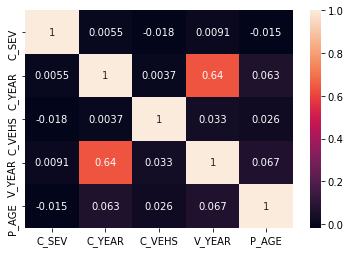

In [28]:
sns.heatmap(correlation, annot=True)

Por lo general, la matriz de correlaciones muestra una baja correlación entre las variables continuas, con la excepción de las variables ```C_YEAR``` y ```V_YEAR```, lo cual tiene mucho sentido, pues ambas variables hacen referencia a años.

El siguiente paso, se centra en representar algunas de las variables, a fin de detectar outliers: 

<AxesSubplot:>

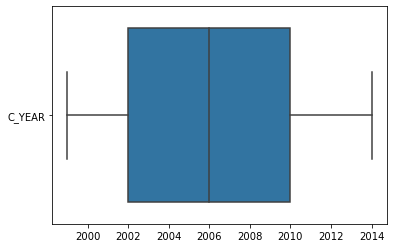

In [29]:
sns.boxplot(data=accidents_temp[['C_YEAR']].dropna(), orient="h")

<AxesSubplot:>

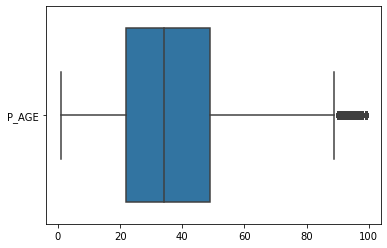

In [30]:
sns.boxplot(data=accidents_temp[['P_AGE']].dropna(), orient="h")

En lo relativo al boxplot de ```P_AGE```, existe un número considerable de outliers en lado derecho. Ello se debe a la naturaleza de la distribución de los accidentes de tráfico, pues es muy habitual que haya muchos accidentados con una edad cercana a los 18-20 años (cuando los conductores son noveles y tienen poca experiencia). Asimismo, también hay muchas circunstancias de accidentes en los que se ven involucrados personas de una edad avanzada, ya que sus capacidades psicotécnicas y reflejos se reducen drásticamente. Por el contrario, es menos frecuente encontrar accidentes en los que la persona tenga una edad media (30-40-50 años), o por lo menos, que dichos accidentes tengan una menor probabilidad de causar muertes. 

Ello explica que para esta variable concreta, exista una gran amplitud de valores que influya en el accidente. 

Finalmente, veamos una descripción de cada valor:

In [31]:
accidents_temp.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,C_YEAR,C_SEV,C_VEHS,V_YEAR,P_AGE
count,5.8604e+06,5.8604e+06,5.85986e+06,5.27603e+06,5.46525e+06
mean,2006,1.98317,2.04577,1998.51,36.399
std,4.56989,0.128636,1.26879,7.12669,18.3692
min,1999,1,1,1901,1
25%,2002,2,2,1994,22
50%,2006,2,2,1999,34
75%,2010,2,2,2004,49
max,2014,2,77,2015,99


Es relevante mencionar que el conteo de valores (que se esperaría que fuera el mismo) no es igual para los valores de las variables ```C_VEHS```, ```V_YEAR``` y ```P_AGE```, pues cuentan con valores especiales (identificados como nulos). 

Destacamos que existe un accidente con 77 vehículos implicados, es posible que se trate de un accidente múltiple. Y también observamos un registro extraño: En ```V_YEAR``` existen vehículos del 2015, pero estos accidentes son hasta el año 2014, por lo que, a priori, no es posible que un vehículo fabricado en 2015 tenga un accidente en 2014.

Busquemos este valor:

In [32]:
accidents_df[accidents_df['V_YEAR'] == '2015'].groupby(acc_columns).count()

V_ID  \
C_YEAR C_MNTH C_WDAY C_HOUR C_SEV C_VEHS C_CONF C_RCFG C_WTHR C_RSUR C_RALN C_TRAF         
2014   01     3      14     2     02     33     02     1      1      1      01         1   
       02     3      01     2     02     31     01     6      5      1      18         1   
              6      18     2     02     35     01     1      Q      1      18         1   
              7      19     2     02     35     02     1      1      1      01         1   
       03     2      18     2     03     21     01     1      1      1      18         1   
...                                                                                  ...   
       12     7      18     1     01     06     01     1      1      2      18         4   
                            2     03     21     01     2      2      2      01         2   
                                  04     21     01     1      1      1      18         1   
                     20     1     02     23     02     2      5      1      18         1   
                     22     2     02     35     UU     1      2      U      01         1   

                                                                                    V_TYPE  \
C_YEAR C_MNTH C_WDAY C_HOUR C_SEV C_VEHS C_CONF C_RCFG C_WTHR C_RSUR C_RALN C_TRAF           
2014   01     3      14     2     02     33     02     1      1      1      01           1   
       02     3      01     2     02     31     01     6      5      1      18           1   
              6      18     2     02     35     01     1      Q      1      18           1   
              7      19     2     02     35     02     1      1      1      01           1   
       03     2      18     2     03     21     01     1      1      1      18           1   
...                                                                                    ...   
       12     7      18     1     01     06     01     1      1      2      18           4   
                            2     03     21     01     2      2      2      01           2   
                                  04     21     01     1      1      1      18           1   
                     20     1     02     23     02     2      5      1      18           1   
                     22     2     02     35     UU     1      2      U      01           1   

                                                                                    V_YEAR  \
C_YEAR C_MNTH C_WDAY C_HOUR C_SEV C_VEHS C_CONF C_RCFG C_WTHR C_RSUR C_RALN C_TRAF           
2014   01     3      14     2     02     33     02     1      1      1      01           1   
       02     3      01     2     02     31     01     6      5      1      18           1   
              6      18     2     02     35     01     1      Q      1      18           1   
              7      19     2     02     35     02     1      1      1      01           1   
       03     2      18     2     03     21     01     1      1      1      18           1   
...                                                                                    ...   
       12     7      18     1     01     06     01     1      1      2      18           4   
                            2     03     21     01     2      2      2      01           2   
                                  04     21     01     1      1      1      18           1   
                     20     1     02     23     02     2      5      1      18           1   
                     22     2     02     35     UU     1      2      U      01           1   

                                                                                    P_ID  \
C_YEAR C_MNTH C_WDAY C_HOUR C_SEV C_VEHS C_CONF C_RCFG C_WTHR C_RSUR C_RALN C_TRAF         
2014   01     3      14     2     02     33     02     1      1      1      01         1   
       02     3      01     2     02     31     01     6      5      1      18         1   
              6      18     2     02     35     01     1      Q      1   

Es posible que tengamos que eliminar estas filas, debido a la falta de coherencia de la información. 

Por otro lado, procedemos a obervar los accidentes múltiples (con 77 vehículos involucrados):

In [33]:
accidents_df[accidents_df['C_VEHS'] == '77'].groupby(acc_columns).count()

,,,,,,,,,,,,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,,,,,,,,,,
2006,02,5,13,1,77,21,QQ,6,1,2,18,113,113,113,113,113,113,113,113,113,113
2013,01,5,15,2,77,21,01,4,3,2,18,116,116,116,116,116,116,116,116,116,116


#### 1.2.6.2 Variables categóricas frente a C_SEV
Una vez realizado el análisis previo, y haber estudiado el diccionario de datos, casi la totalidad las columnas del dataset son categóricas, a excepción de las referentes a año o meses. A continuación, procederemos a analizar las variables categóricas respecto a la variable objetivo ```C_SEV```.

Al analizar la variable categórica, pudimos ver que existe un importante desiquilibrio, pues el dataset posee una gran cantidad de accidentes no mortales, en comparación con los accidentes en los que al menos se produjo una víctima mortal. 

A fin de poder comparar las variables categóricas, haremos una normalización por grupos, de tal forma que el conjunto de valores registrados de una categoría se normalizará por el total de accidentes mortales o no mortales. Para ello, se creará una función que se reutilizará en el futuro:

In [34]:
def norm_category(df = None, obj_val = "", cat_val = ""):
    '''
    Normaliza el conteo de la variable en función de la variable objetivo.
    :param df: Dataset
    :param obj_val: Variable objetivo
    :param cat_val: Variable 
    :return: Dataframe
    '''
    
    # Agrupamos y contamos las ocurrencias de las categorías en función de la variable objetivo.
    grouped = df.groupby([obj_val, cat_val]).count().iloc[:,1]
    grouped = grouped.reset_index()
    grouped.columns = [obj_val, cat_val, 'counted']
    
    # Calculamos el porcentaje para cada grupo (variable objetivo) del total de elementos de dicha categoría (subgrupo)
    grouped['group%'] = np.round(grouped['counted'] / 
                                 grouped.groupby(obj_val)['counted'].transform('sum') * 100, decimals = 3)
    return grouped

Una vez hemos agrupado adecuadamente los datos, procedemos a graficar las variables de estudio con respecto a la variable objetivo (```C_SEV```), empleando el siguiente bucle:


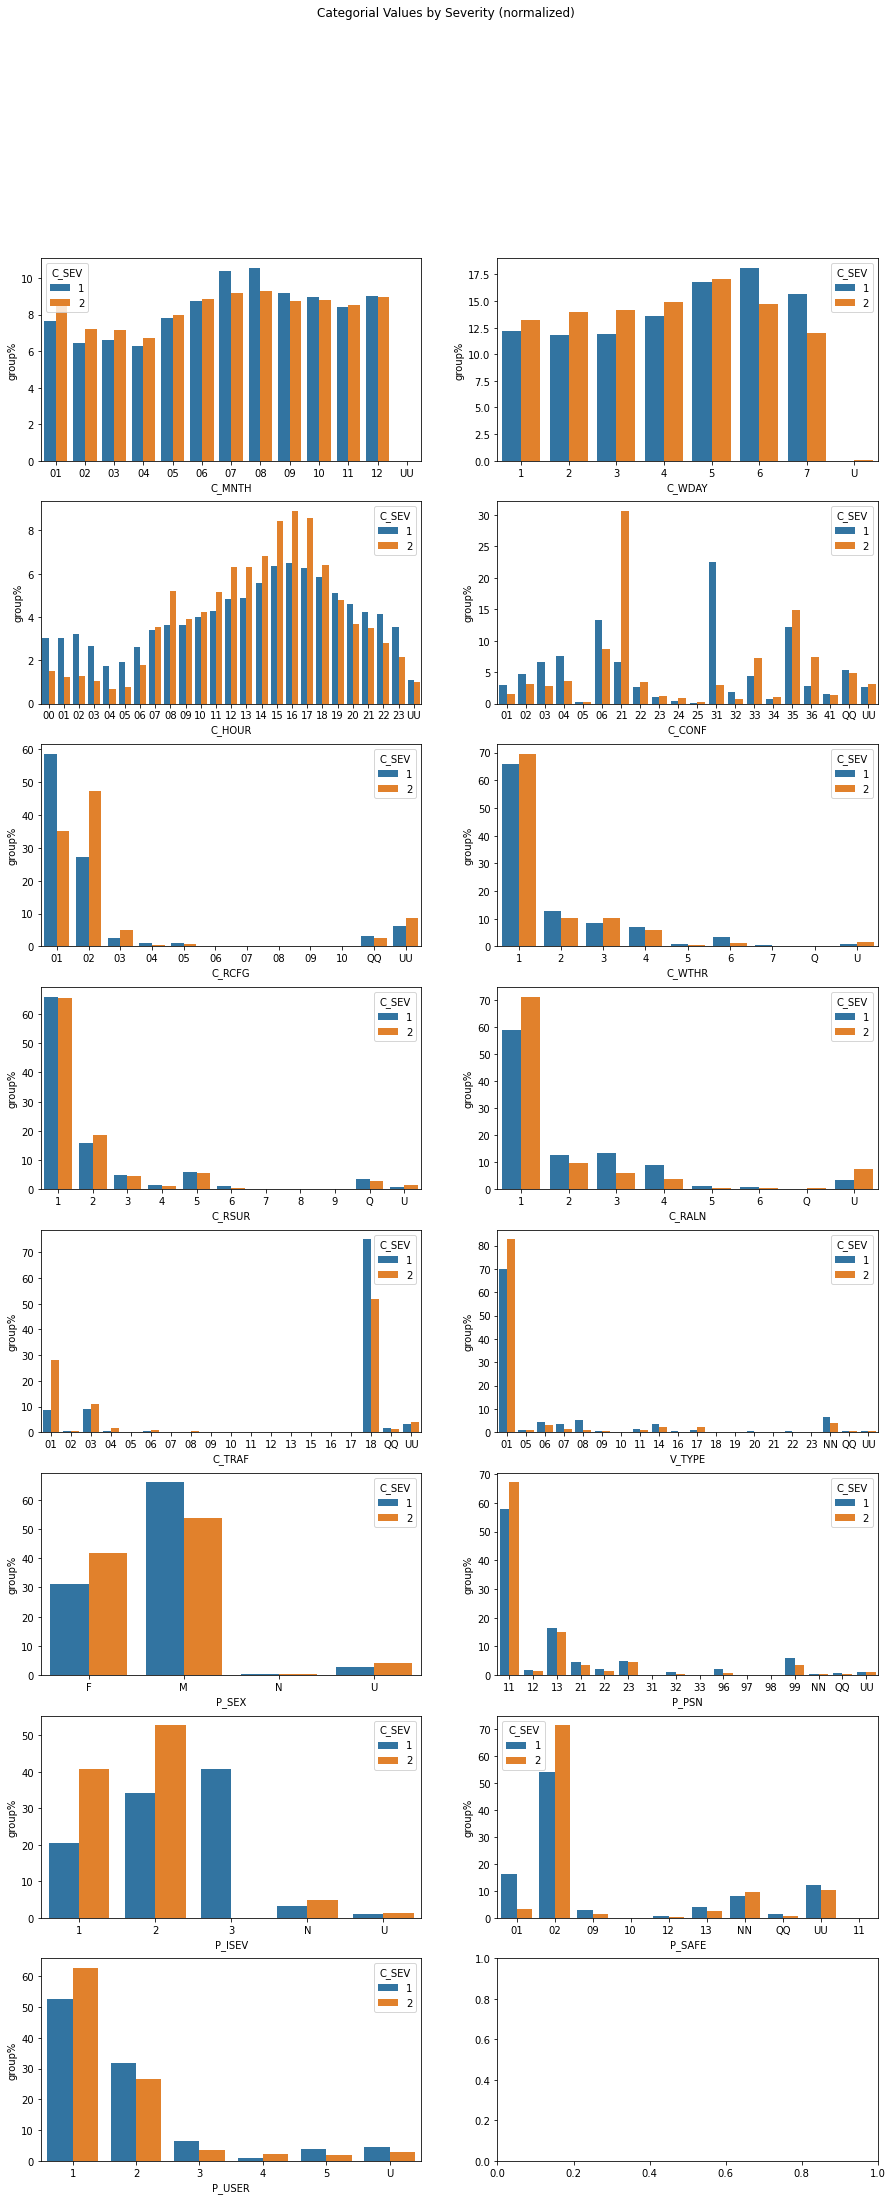

In [35]:
categorical = ['C_MNTH', 'C_WDAY', 'C_HOUR', 'C_CONF', 
               'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 
               'C_TRAF', 'V_TYPE', 'P_SEX', 'P_PSN', 
               'P_ISEV', 'P_SAFE', 'P_USER']

fig, axes = plt.subplots(8, 2, figsize=(15, 35), sharey=False)
fig.suptitle('Categorial Values by Severity (normalized)')

i = 0 # fila del dibujo
j = 0 # columna del dibujo

# Impresión de cada categoría
for cat in categorical:
    # Normalizamos la categoría para que sea visulamente interpretable
    temp = norm_category(df = accidents_df, obj_val = 'C_SEV', cat_val = cat)
    # Creamos la gráfica
    sns.barplot(data = temp, x = cat, y = 'group%', hue = 'C_SEV', ax = axes[i,j]);
    
    # Modificamos los índices de las gráficas para su dibujo
    if (j == 0): 
        j = 1
    else:
        j = 0
        i += 1

Algunas ideas tras visualizar los gráficos:

Observamos como los accidentes son más mortales durante los meses de julio y agosto. Esto parece razonable pues son los meses vacacionales donde las personas realizan mayor cantidad de viajes y desplazamientos, y por lo tanto es altamente probable que ocurran accidentes graves durante esas fechas. También se evidencia que en los fines de semana (sábado y domingo), aumenta la probabilidad tienen de sufrir accidentes mortales. En estos periodos no laborales generalmente es cuando más viajes se realizan.

En lo relativo a la meteorología, la mayor parte de los accidentes tienen lugar en condiciones meterorológicas favorables (despejado o soleado), aunque la mortalidad que tienen es menor. Por el contrario, ante situaciones como día nublado, nieve o visibilidad limitada existe una mayor probabilidad de muerte. Resulta curios ver como ante días lluviosos la severidad es menor. Esto puede entenderse si pensamos que en los días con tiempo desfavorble los conductores estan más atentos lo que reduce los accidentes.

Por otro lado, algo llamativo con esta gráfica es que observamos un desequilibrio en esta muestra, pues casi todos los valores que se poseen son referentes a accidentes en días soleados. Lo que perjudica a la hora de que esta variable pueda ser determinante para valorar la severidad del accidente, es decir, puede existir un sesgo que afecte a nuestro modelo. Esta situación se puede observar en otras variables, por lo que tendremos que tener en cuenta este hecho a la hora de seleccionar variables.

Por lo tanto, y a tenor de lo detallado en este documento, podemos concluir que el análisis se llevará a cabo con **2 variables objetivo**, que serán ```C_SEV``` y ```P_ISEV```: una enfocada a determinar si existen o no fallecidos, y la otra para predecir si van a necesitar un tratamiento médico (hospitalización, medicamentos, rehabilitación, fisioterapia, ortopedia...). 

Posteriormente se detallará concretamente cómo se construyen los modelos.

## 1.3 Algunas respuestas a raíz del análisis

Respondamos a algunas preguntas interesantes:

1. **¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?**

Observando las gráficas, podemos determinar que los vehículos de carga y transporte suelen tener mayor porcentaje de accidentes.
En cuanto a la antiguedad podemos analizar a continuación la siguiente gráfica:

<function seaborn.rcmod.reset_orig()>

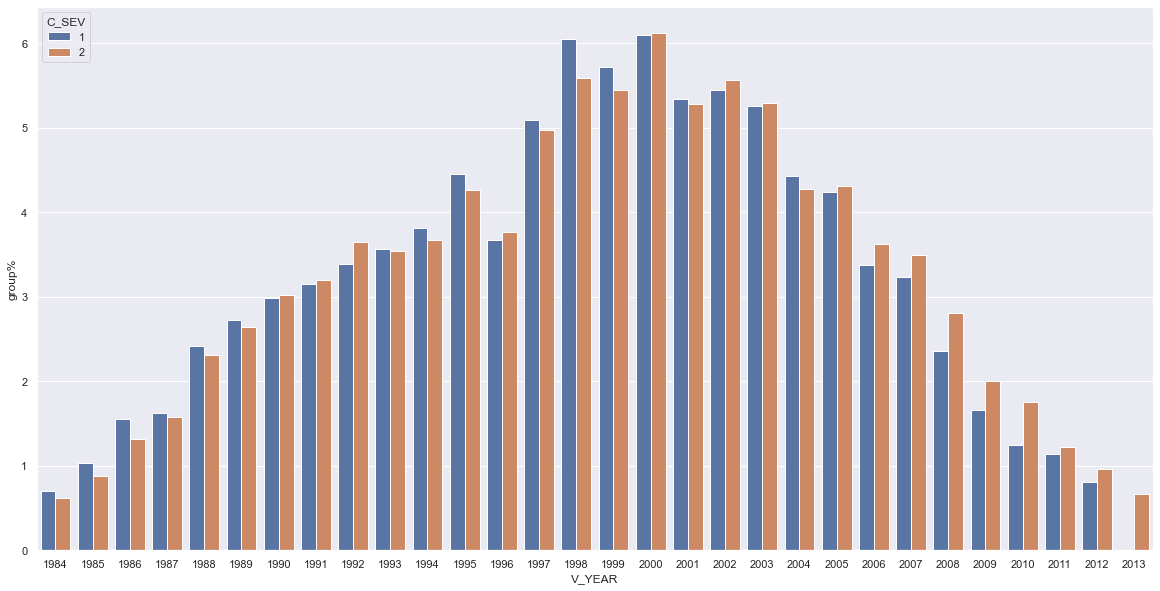

In [36]:
vyear_df = accidents_df[accidents_df['V_YEAR'].isin(['NNNN', 'UUUU']) != True]
vyear_df = norm_category(df = vyear_df, obj_val = 'C_SEV', cat_val = 'V_YEAR')
vyear_df = vyear_df[vyear_df['group%'] > 0.5]

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data = vyear_df, x = 'V_YEAR', y = 'group%', hue = 'C_SEV');
sns.reset_orig

Tal y como muestra la gráfica, los vehículos más antiguos tienen más accidentes mortales que los vehículos más nuevos. Si bien la muestra del dataset se concentra en los vehículos fabricados entre el 1997 y 2004

Por otro lado, analizando las edades de los conductores:

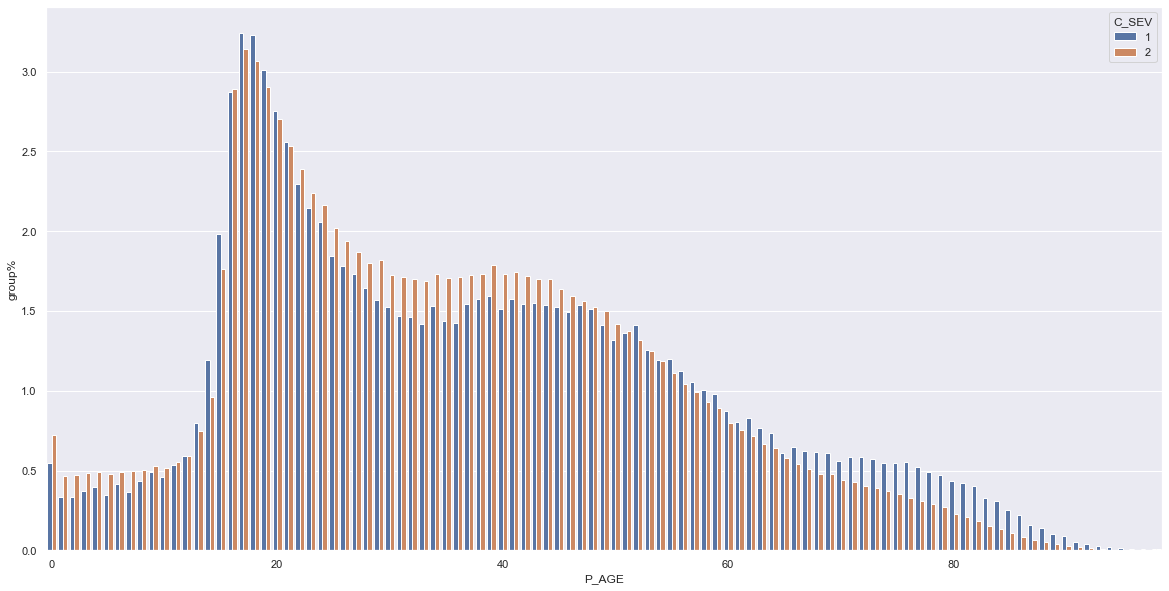

<function seaborn.rcmod.reset_orig()>

In [37]:
page_df = accidents_df[(accidents_df['P_AGE'].isin(['NN', 'UU']) == False)]
page_df = norm_category(df = page_df, obj_val = 'C_SEV', cat_val = 'P_AGE')

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data = page_df, x = 'P_AGE', y = 'group%', hue = 'C_SEV');
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))
plt.show()
sns.reset_orig

En lo relativo a la edad, se observa que conductores jóvenes (y por ende, más inexpertos) tienen concentran el mayor número de accidentes, que además suelen conllevar una mayor mortalidad que en otro grupo de edad (por ejemplo, personas de entre 30 y 40 años). 

Por el contrario, una vez una persona se adentra en los 70 años, la mortalidad en ese tipo de casos se dispara drásticamente, lo cual tiene sentido, ya que los ancianos son más propensos a tener accidentes graves a consecuencia del deterioro de sus capacidades psicotécnicas, así como son más vulnerables en caso de un siniestro grave, pues tienen menos posibilidades de salir ilesos. 

En definitiva: hay muchos accidentes de personas jóvenes, con una mortalidad alta con edades entre 16 y 20 años, y una alta mortalidad en personas de elevada edad, aunque tienen menos accidentes, al haber menos conductores ancianos.

En cuanto al sexo, la mayoría de conductores registrados con accidentes son hombres, si bien también hay un alto porcentaje en mujeres, por lo que no podemos considerarlo un hecho muy diferenciador.

2. **¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?**

Estudiando las gráficas obtenidas anterioremente, se puede observar que los vehículos más nuevos tienen menos accidentes mortales. Asimismo, los conductores de mediana edad (de los 30 a los 60 años aproximadamente) tienen menos propensión a tener accidentes mortales, pues combinan una considerable experiencia al volante con la madurez característica de su edad (tanto física como mental).

3. **¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?**

Podemos realizar un pequeño análisis de las variables a nivel visual:
* Observamos que la tipología del accidente afecta a la mortalidad del mismo. Por ejemplo los accidentes frontales tienen un elevado porcentaje de mortalidad.
* La señalización o nivel de seguridad existente en la carretera. Cuando no existe esta señalización es altamente probable que el accidente cause muertos. 
* Por otro lado el tiempo cuando ocurre el accidente contribuye en cierta manera. Fines de semana y periodos vacacionales son en los que existe una probabilidad elevada de accidentes mortales.


## 1.4 Conclusiones 

### 1.4.1 Conclusiones generales
A raíz de este análisis hemos podido comprender mejor los datos que tenemos y sus principales características. Además hemos detectado posibles problemas del mismo a los que tendremos que establecer algún tipo de solución para poder utilizar estos datos en el modelado.

A continuación enunciamos las conclusiones y principales ideas obtenidas:
* **Missing values**: Existen un porcentaje considerable de valores especiales o missings. Será necesario establecer un adecuado criterio de tratamiento, especialmente para aquellas variables altamente afectadas. Entre las posibles opciones, se valora aplicar un criterio de valor medio para los porcentajes elevados y una eliminación en porcentajes bajos.
* **Variable objetivo**: Dos aspectos a comentar:
    - Hay un desbalanceo importante de la variable objetivo ```C_SEV```. Existiendo un 98% de valores 2 y un 2% de valores 1 aproximadamente. Es por ello que será necesario realizar un reequilibrado del dataset previo a cualquie transformación o división. 
    - El segundo modelo, la variable ```P_ISEV``` muestra varias categorías y valores especiales, por lo que tendrá que ser tratada previamente a su uso para el modelo final. 
* **Variables numéricas**: Entre las variables puramente numéricas (no categóricas) existe una baja correlación. A excepción de las variables ```C_YEAR``` y ```V_YEAR``` sobre las que existe una importante correlación entre sí, lo que implica que será necesario eliminar una de ellas. Se discutirá más detallamente en el preprocesado. 
* **Valores anómalos**: En el análisis de las variables numéricas hemos detecado un valor extraño para la naturaleza del dataset. Este recoge información hasta el año 2014, sin embargo, tenemos vehículos fabricados 2015. Estos valores deberán de ser eliminados del dataset, pues no es posible que un vehiculo del año 2015 se vea implicado en un accidente del 2014. 
* **Variables categórias**:
    - Hemos observado la relación de las variables categóricas del modelo con la variable objetivo. Que nos ha permitido determinar variables significativas para el modelo. Además hemos observado algún que otro desbalanceo en los valores de la muestra que podría llevar a un sesgo. Habría que estudiar la selección de variables mediante un algoritmo de regresión que permita reforzar la decisión a tomar. 
    - Estas variables ya han sido transformadas en numéricas, lo que reduce su tratamiento a la hora de realizar un *encoding*. Si bien la existencia de muchas categorías en algunos casos, no recomienda utilizar técnicas como *OneHot*.


Por otro lado destacamos alguna tarea en la que habría que hacer más hincapié en los posteriores análisis durante el preprocesado:
* Estudio de outliers y correlaciones: Se deberá de estudia mejos la presencia de outliers en el modelo así como las correlaciones. Las razones detrás del poco estudio que se ha realizado en esta sección sobre estos temas, reside en que estos no se han leido como valore númericos al tener valores especiales, lo que dificulta a priori su análisis.


### 1.4.2 Propuesta de modelos

Una vez realizado el análisis exploratorio de los datos, y su correspondiente análisis, procedemos a mostrar la solución que hemos considerado, con el objetivo de responder el problema planteado: 

#### 1.4.2.1 Predecir fallecimientos ```C_SEV```
Para este problema, se busca elaborar un modelo que permite precedir si se producirán o no fallecimientos dado un accidente ```C_SEV```. No obstante, y tal y como se detalla en el ```01_EDA.ipynb```, los datos están referidos a personas en un accidente concreto, de manera que se puede prescindir de la información detallada sobre las personas y los vehículos **para estos modelos**, ya que no determinan si se van a producir accidentes. 

Si empleáramos los datos tal cual se encuentran en el dataset, estaríamos dando al modelo varias filas que representan el mismo accidente, si bien, cada una posee datos distintos de cada una de las personas, tal y como hemos observado en el ```01_EDA.ipynb```. Por ello, tiene más sentido dar al modelo únicamente datos del accidente en general, y en su caso crear información agregada a partir de la información que se tiene de las personas involucradas en el accidente.

En conclusión, el modelo busca predecir la variable ```C_SEV``` que indica la existencia de al menos un fallecido en el accidente. Por lo tanto, proporcionaremos información general del accidente y agregada de los detalles que se conocen del mismo. En cuanto a la información agregada se considera que resulta interesante el número de personas involucradas y la edad media de estas. 

#### 1.4.2.2 Predecir necesidad de tratamiento médico ```P_ISEV```
En este problema, se busca conocer si una persona en un accidente requerirá o no de un tratamiento médico```P_ISEV```. Para ello, necesitamos conocer, no sólo los datos del accidente a nivel general, sino también otra información más detallada, relativa a la persona en ese accidente. 

En este caso, el dataset proporciona una información muy precisa sobre la persona en el siniestro en cuestión, y por lo tanto son idóneos para poder determinar si habrá necesidad de tratamiento médico o no. 

Este modelo predecirá la variable ```P_ISEV``` que indica el estado de esa persona después del accidente, pudiendo resultar ileso, herido o fallecido. Asumiendo que si se está herido se requiere de un tratamiento médico y eliminando los datos referentes a fallecidos, de manera que el modelo ofrezca una clasificación binaria. 

Puede observarse a continuación un dibujo esquema de los datos que alimentaran ambos modelos:
<p align="center">
  <img width="700" height="700" src="../images/models.png">
</p>

Es relevante mencionar que en este trabajo nos centraremos en el primero modelo, es decir, la prediccion de mortalidad de un accidente. 

----

<div style='text-align:center'>Elaborado por Álvaro Serrano del Rincón (<i>a.serranodelrincon@cunef.edu</i>)</div> 
<div style='text-align:center'>y Carlos Viñals Guitart (<i>carlos.vinals@cunef.edu</i>)</div> 